# Project 1.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
medicare_path = "resources/Medicare_Inpatient_Hospital_by_Provider_and_Service_2021.csv" 

# Read the mouse data and the study results
medicare_data = pd.read_csv(medicare_path)


# Display the data table for preview
medicare_data.head()


,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,30,160063.40000,36794.266670,33141.400000
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,16,107171.12500,26893.937500,22705.687500
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,20,192609.90000,31374.650000,27815.600000
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,38,EXTRACRANIAL PROCEDURES WITH CC,18,112215.66670,12354.777780,8848.666667
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,1.0,Metropolitan area core: primary flow within an...,39,EXTRACRANIAL PROCEDURES WITHOUT CC/MCC,43,89606.95349,8284.186047,6182.697674


In [7]:
medicare_data.describe()
#count reveals each column contains 151989 rows, indicating no missing data
#check for NA

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,DRG_Cd,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
count,151989.000000,151989.000000,151989.000000,151989.000000,151989.000000,151989.000000,1.519890e+05,151989.000000,151989.000000
mean,255627.918751,27.955082,47407.442710,1.798583,421.301588,34.560909,8.311592e+04,18182.927578,15282.824775
std,151927.769369,15.411830,28415.829241,6.431545,253.106873,51.031237,1.051981e+05,20446.575550,17964.769050
min,10001.000000,1.000000,1040.000000,1.000000,1.000000,11.000000,3.340845e+03,2383.923077,132.923077
25%,110036.000000,13.000000,24014.000000,1.000000,228.000000,14.000000,3.208451e+04,8217.538462,6500.611111
50%,240207.000000,27.000000,44053.000000,1.000000,377.000000,20.000000,5.333833e+04,12327.039060,10196.000000
75%,380018.000000,41.000000,73070.000000,1.000000,639.000000,35.000000,9.466100e+04,20001.594600,16732.233330
max,670309.000000,56.000000,99801.000000,99.000000,988.000000,2650.000000,3.697459e+06,632473.076900,610619.909100


In [11]:
# Checking the number of conditions; there are 538 DRG codes versus 524 DRG descriptions 
drg_count = medicare_data["DRG_Desc"].nunique()
drg_count

524

In [23]:
drg_df = medicare_data.groupby("DRG_Desc")["DRG_Desc"].count().sort_values(ascending=False)
drg_df.head(20)


#Top 20 are:
# RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC                                        2830
# SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC                                2718
# HEART FAILURE AND SHOCK WITH MCC                                                         2653
# SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC                             2309
# SIMPLE PNEUMONIA AND PLEURISY WITH MCC                                                   2205
# KIDNEY AND URINARY TRACT INFECTIONS WITHOUT MCC                                          2078
# RENAL FAILURE WITH CC                                                                    2047
# PULMONARY EDEMA AND RESPIRATORY FAILURE                                                  2040
# GASTROINTESTINAL HEMORRHAGE WITH CC                                                      2018
# ESOPHAGITIS, GASTROENTERITIS AND MISCELLANEOUS DIGESTIVE DISORDERS WITHOUT MCC           2014
# RENAL FAILURE WITH MCC                                                                   1991
# MISCELLANEOUS DISORDERS OF NUTRITION, METABOLISM, FLUIDS AND ELECTROLYTES WITHOUT MCC    1922
# MISCELLANEOUS DISORDERS OF NUTRITION, METABOLISM, FLUIDS AND ELECTROLYTES WITH MCC       1857
# ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE WITH MCC                                   1853
# INFECTIOUS AND PARASITIC DISEASES WITH O.R. PROCEDURES WITH MCC                          1840
# KIDNEY AND URINARY TRACT INFECTIONS WITH MCC                                             1833
# INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION WITH CC OR TPA IN 24 HOURS                1821
# HIP AND FEMUR PROCEDURES EXCEPT MAJOR JOINT WITH CC                                      1805
# CELLULITIS WITHOUT MCC                                                                   1765
# CHRONIC OBSTRUCTIVE PULMONARY DISEASE WITH MCC 

DRG_Desc
RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC                                        2830
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC                                2718
HEART FAILURE AND SHOCK WITH MCC                                                         2653
SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC                             2309
SIMPLE PNEUMONIA AND PLEURISY WITH MCC                                                   2205
KIDNEY AND URINARY TRACT INFECTIONS WITHOUT MCC                                          2078
RENAL FAILURE WITH CC                                                                    2047
PULMONARY EDEMA AND RESPIRATORY FAILURE                                                  2040
GASTROINTESTINAL HEMORRHAGE WITH CC                                                      2018
ESOPHAGITIS, GASTROENTERITIS AND MISCELLANEOUS DIGESTIVE DISORDERS WITHOUT MCC           2014
RENAL FAILURE WITH MCC                             

In [34]:
#Complication and co-morbidity (CC) or major CC (MCC)
# SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC

sep_mcc = medicare_data.loc[medicare_data["DRG_Desc"]=="SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITH MCC"]

#Cost summary
mean_subm_chrg_sep_mcc = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].mean().sort_values(ascending=False)
mean_tot_paymt_sep_mcc = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Tot_Pymt_Amt"].mean().sort_values(ascending=False)
mean_med_paymt_sep_mcc = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Mdcr_Pymt_Amt"].mean().sort_values(ascending=False)
# med_submitted_charge = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].median()
# var_submitted_charge = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].var()
# sd_submitted_charge = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].std()
# sem_submitted_charge = sep_mcc.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].sem()

cost_summary_sep_mcc = pd.DataFrame({
"Mean Submitted Covered Charge": mean_subm_chrg_sep_mcc,
"Average Total Payment Amount": mean_tot_paymt_sep_mcc,
"Average Medicare Payment Amount": mean_med_paymt_sep_mcc

})
cost_summary_sep_mcc


,Mean Submitted Covered Charge,Average Total Payment Amount,Average Medicare Payment Amount
Rndrng_Prvdr_State_Abrvtn,,,
AK,84611.451284,27184.162910,25228.572857
AL,65082.085331,13619.981751,11467.334724
AR,46657.009815,12906.422388,11400.033975
AZ,83729.376898,15987.220234,13918.213643
CA,114488.611691,21627.097657,18551.898044
CO,83538.145801,16775.801685,14354.140980
CT,53104.028492,18524.823135,16317.390069
DC,97006.030062,22664.944952,17417.004482
DE,55242.067692,18177.481047,15998.810707


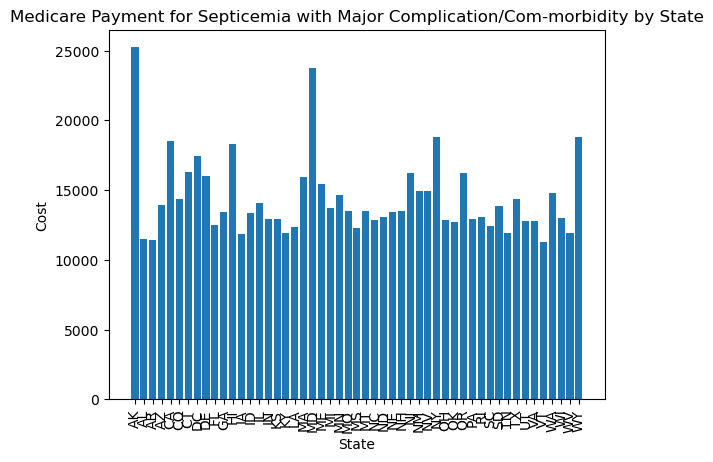

In [44]:
# Create a bar chart of medicare payments by state
height = cost_summary_sep_mcc["Average Medicare Payment Amount"]

plt.bar(x=cost_summary_sep_mcc.index, height=height)
plt.title("Medicare Payment for Septicemia with Major Complication/Com-morbidity by State")
plt.xlabel("State")
plt.ylabel("Cost")
plt.xticks(rotation = 90)
plt.show()

In [35]:




# SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC
sep = medicare_data.loc[medicare_data["DRG_Desc"]=="SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOURS WITHOUT MCC"]

#Cost summary
mean_subm_chrg_sep = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].mean().sort_values(ascending=False)
mean_tot_paymt_sep = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Tot_Pymt_Amt"].mean().sort_values(ascending=False)
mean_med_paymt_sep = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Mdcr_Pymt_Amt"].mean().sort_values(ascending=False)
# med_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].median()
# var_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].var()
# sd_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].std()
# sem_submitted_charge = sep.groupby("Rndrng_Prvdr_State_Abrvtn")["Avg_Submtd_Cvrd_Chrg"].sem()

cost_summary_sep = pd.DataFrame({
"Mean Submitted Covered Charge": mean_subm_chrg_sep,
"Average Total Payment Amount": mean_tot_paymt_sep,
"Average Medicare Payment Amount": mean_med_paymt_sep

})
cost_summary_sep

,Mean Submitted Covered Charge,Average Total Payment Amount,Average Medicare Payment Amount
Rndrng_Prvdr_State_Abrvtn,,,
AK,57205.032628,13220.329022,11556.842367
AL,39761.379826,7754.657359,5755.933901
AR,26079.544720,6961.548592,5618.826287
AZ,45686.292307,8478.176307,6695.179165
CA,64239.051959,11384.972145,8896.876512
CO,49640.401837,8738.209222,6706.375726
CT,31136.077864,10096.485538,7762.660993
DC,49235.648604,11586.027624,7786.628341
DE,32209.798697,9022.817980,6771.355042


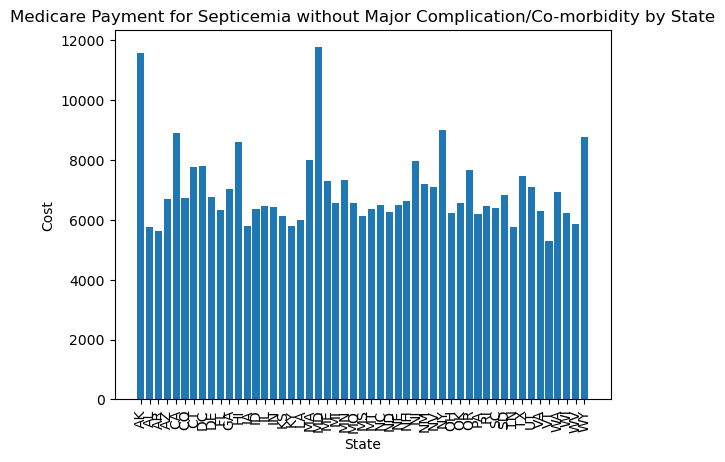

In [45]:
# Create a bar chart of medicare payments by state
height = cost_summary_sep["Average Medicare Payment Amount"]

plt.bar(x=cost_summary_sep.index, height=height)
plt.title("Medicare Payment for Septicemia without Major Complication/Co-morbidity by State")
plt.xlabel("State")
plt.ylabel("Cost")
plt.xticks(rotation = 90)
plt.show()


In [ ]:
#Create dataset with only top 5 diagnoses

In [ ]:
#Narrow down to 5 states with highest discharge rates  

In [ ]:
#Summary of payments by state
#Summary of discharge by state

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the costs for each DRG

# Use groupby and summary statistical methods to calculate the following properties of each DRG: 
# mean, median, variance, standard deviation, and SEM of payment (Avg_Submtd_Cvrd_Chrg, Avg_Tot_Pymt_Amt, Avg_Mdcr_Pymt_Amt). 
# Assemble the resulting series into a single summary DataFrame.

#National avergages that can be used for comparison to state averages 

mean_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].mean().sort_values(ascending=False)
mean_tot_paymt = medicare_data.groupby("DRG_Desc")["Avg_Tot_Pymt_Amt"].mean().sort_values(ascending=False)
mean_med_paymt = medicare_data.groupby("DRG_Desc")["Avg_Mdcr_Pymt_Amt"].mean().sort_values(ascending=False)
# med_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].median()
# var_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].var()
# sd_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].std()
# sem_submitted_charge = medicare_data.groupby("DRG_Desc")["Avg_Submtd_Cvrd_Chrg"].sem()

cost_summary = pd.DataFrame({
"Mean Submitted Covered Charge": mean_submitted_charge,
"Average Total Payment Amount": mean_tot_paymt,
"Average Medicare Payment Amount": mean_med_paymt

})


cost_summary


,Mean Submitted Covered Charge,Average Total Payment Amount,Average Medicare Payment Amount
DRG_Desc,,,
ACUTE ADJUSTMENT REACTION AND PSYCHOSOCIAL DYSFUNCTION,38587.133562,9176.613532,7090.757248
ACUTE LEUKEMIA WITHOUT MAJOR O.R. PROCEDURES WITH CC,176134.324980,43756.518649,36612.054830
ACUTE LEUKEMIA WITHOUT MAJOR O.R. PROCEDURES WITH MCC,290570.065138,75755.401750,62477.587568
"ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE WITH CC",44073.373635,8169.625116,6337.910304
"ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE WITH MCC",64161.739085,13769.685930,11796.373274
...,...,...,...
VENTRICULAR SHUNT PROCEDURES WITHOUT CC/MCC,72615.008298,16324.271218,13772.101823
VIRAL ILLNESS WITH MCC,110632.609540,20604.250106,16093.911222
VIRAL ILLNESS WITHOUT MCC,50115.627829,11349.739920,7593.582113


## Bar and Pie Charts

## Quartiles, Outliers and Boxplots

## Line and Scatter Plots

## Correlation and Regression